# Product Price Estimation

## Read the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/products.csv")

In [3]:
data.head()

,Product ID,Product Name,Price,Stock Quantity,Warranty Period,Product Dimensions,Manufacturing Date,Expiration Date,Color/Size Variations,Product Ratings
0,93TGNAY7,Laptop,NaN,3.0,2.0,16x15x15 cm,2023-01-01,2026-01-01,Green/Large,NaN
1,TYYZ5AV7,Smartphone,214.37,92.0,2.0,15x19x19 cm,2023-03-15,2025-01-01,Red/Small,2.0
2,5C94FGTQ,Headphones,475.29,19.0,2.0,9x6x6 cm,2023-03-15,2026-01-01,Red/Small,NaN
3,XBHKYPQB,Monitor,NaN,40.0,1.0,7x13x5 cm,2023-01-01,2026-01-01,Green/Large,NaN
4,728GCZFU,Laptop,229.81,32.0,2.0,20x20x19 cm,2023-07-30,2026-01-01,Blue/Medium,4.0


In [4]:
data.describe()

,Price,Stock Quantity,Warranty Period,Product Ratings
count,8500.000000,8605.000000,8800.000000,7638.000000
mean,254.767901,50.595119,2.015000,3.025007
std,143.028881,28.912863,0.819832,1.425383
min,10.220000,1.000000,1.000000,1.000000
25%,129.855000,25.000000,1.000000,2.000000
50%,252.715000,50.000000,2.000000,3.000000
75%,380.837500,76.000000,3.000000,4.000000
max,499.970000,100.000000,3.000000,5.000000


In [5]:
data.isnull().sum() / len(data) * 100

Product ID                0.00
Product Name              0.00
Price                    15.00
Stock Quantity           13.95
Warranty Period          12.00
Product Dimensions        0.00
Manufacturing Date        0.00
Expiration Date           0.00
Color/Size Variations     0.00
Product Ratings          23.62
dtype: float64

## Visualizations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

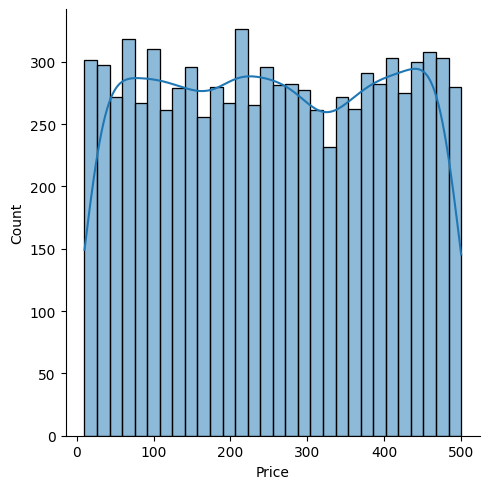

In [7]:
sns.displot(data['Price'], kde=True, bins=30)
plt.show()

<Axes: xlabel='Warranty Period'>

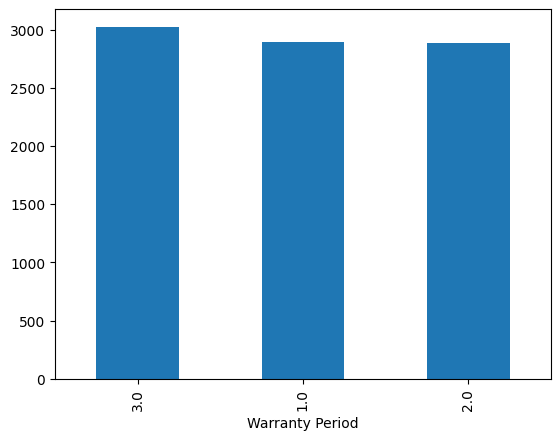

In [8]:
data['Warranty Period'].value_counts().plot.bar()

## Handling Missing Values

In [9]:
import missingno as msno

<Axes: >

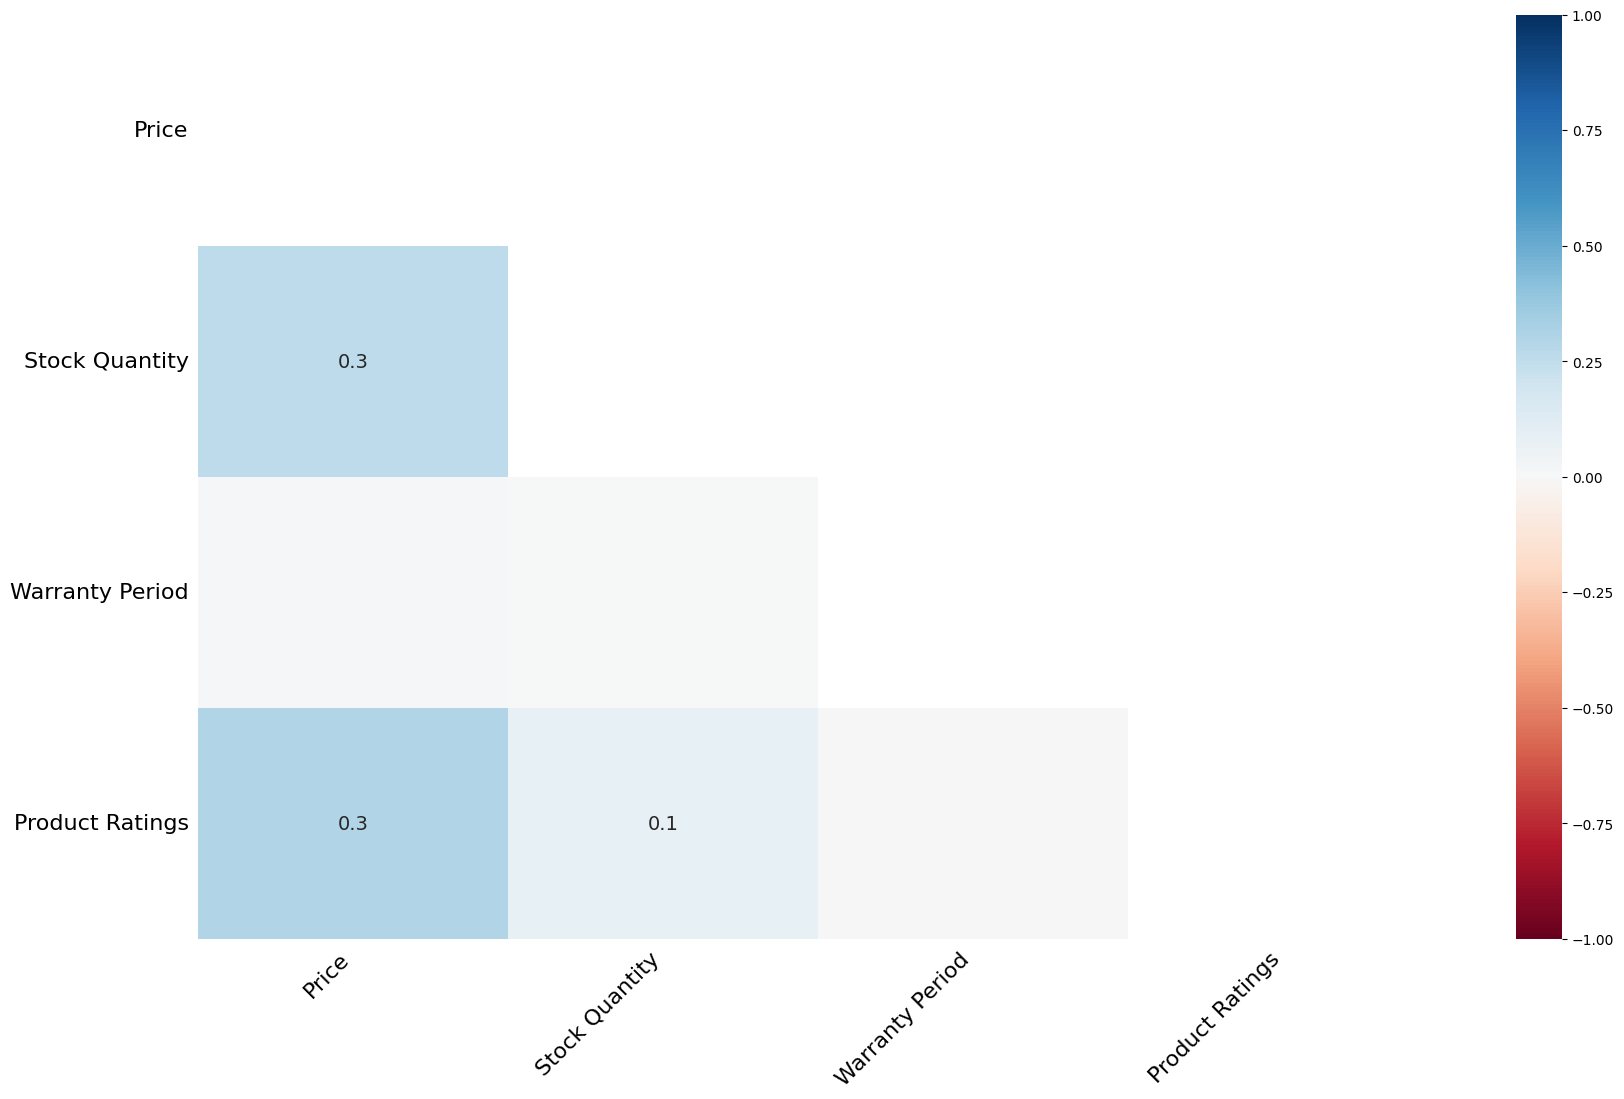

In [10]:
msno.heatmap(data)

In [11]:
data["Warranty Period"].median()

np.float64(2.0)

In [13]:
data["Warranty Period"] = data["Warranty Period"].fillna(data["Warranty Period"].median())

In [14]:
data.isnull().sum()

Product ID                  0
Product Name                0
Price                    1500
Stock Quantity           1395
Warranty Period             0
Product Dimensions          0
Manufacturing Date          0
Expiration Date             0
Color/Size Variations       0
Product Ratings          2362
dtype: int64

In [15]:
from sklearn.impute import KNNImputer

In [16]:
imputer = KNNImputer(n_neighbors=5)

In [17]:
data[["Price", "Stock Quantity", "Product Ratings"]]

,Price,Stock Quantity,Product Ratings
0,NaN,3.0,NaN
1,214.37,92.0,2.0
2,475.29,19.0,NaN
3,NaN,40.0,NaN
4,229.81,32.0,4.0
...,...,...,...
9995,21.48,91.0,1.0
9996,403.92,19.0,4.0
9997,484.46,NaN,1.0
9998,411.63,NaN,NaN


In [18]:
data[["Price", "Stock Quantity", "Product Ratings"]] = imputer.fit_transform(data[["Price", "Stock Quantity", "Product Ratings"]])

In [19]:
data.isnull().sum()

Product ID               0
Product Name             0
Price                    0
Stock Quantity           0
Warranty Period          0
Product Dimensions       0
Manufacturing Date       0
Expiration Date          0
Color/Size Variations    0
Product Ratings          0
dtype: int64

## Feature Engineering

In [20]:
data

,Product ID,Product Name,Price,Stock Quantity,Warranty Period,Product Dimensions,Manufacturing Date,Expiration Date,Color/Size Variations,Product Ratings
0,93TGNAY7,Laptop,313.342,3.0,2.0,16x15x15 cm,2023-01-01,2026-01-01,Green/Large,3.2
1,TYYZ5AV7,Smartphone,214.370,92.0,2.0,15x19x19 cm,2023-03-15,2025-01-01,Red/Small,2.0
2,5C94FGTQ,Headphones,475.290,19.0,2.0,9x6x6 cm,2023-03-15,2026-01-01,Red/Small,2.4
3,XBHKYPQB,Monitor,265.532,40.0,1.0,7x13x5 cm,2023-01-01,2026-01-01,Green/Large,2.6
4,728GCZFU,Laptop,229.810,32.0,2.0,20x20x19 cm,2023-07-30,2026-01-01,Blue/Medium,4.0
...,...,...,...,...,...,...,...,...,...,...
9995,J29B6RDI,Headphones,21.480,91.0,3.0,10x16x9 cm,2023-03-15,2026-01-01,Blue/Medium,1.0
9996,L1HL7437,Laptop,403.920,19.0,2.0,13x8x5 cm,2023-01-01,2024-01-01,Red/Small,4.0
9997,FD57S4E1,Laptop,484.460,58.6,2.0,5x15x15 cm,2023-01-01,2024-01-01,Red/Small,1.0
9998,RPYLOB1M,Headphones,411.630,58.8,1.0,17x11x17 cm,2023-07-30,2026-01-01,Red/Small,3.2


In [21]:
data = data.drop(columns=["Product ID"])

In [22]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Product Dimensions,Manufacturing Date,Expiration Date,Color/Size Variations,Product Ratings
0,Laptop,313.342,3.0,2.0,16x15x15 cm,2023-01-01,2026-01-01,Green/Large,3.2
1,Smartphone,214.370,92.0,2.0,15x19x19 cm,2023-03-15,2025-01-01,Red/Small,2.0
2,Headphones,475.290,19.0,2.0,9x6x6 cm,2023-03-15,2026-01-01,Red/Small,2.4
3,Monitor,265.532,40.0,1.0,7x13x5 cm,2023-01-01,2026-01-01,Green/Large,2.6
4,Laptop,229.810,32.0,2.0,20x20x19 cm,2023-07-30,2026-01-01,Blue/Medium,4.0
...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,10x16x9 cm,2023-03-15,2026-01-01,Blue/Medium,1.0
9996,Laptop,403.920,19.0,2.0,13x8x5 cm,2023-01-01,2024-01-01,Red/Small,4.0
9997,Laptop,484.460,58.6,2.0,5x15x15 cm,2023-01-01,2024-01-01,Red/Small,1.0
9998,Headphones,411.630,58.8,1.0,17x11x17 cm,2023-07-30,2026-01-01,Red/Small,3.2


In [23]:
def extract_dimensions(dimension):
    dimension = dimension.replace(" cm", "")
    w, h, d = dimension.split("x")
    return w, h, d

In [24]:
widths = []
heights = []
depths = []

for dim in data["Product Dimensions"].values:
    w, h, d = extract_dimensions(dim)
    widths.append(int(w))
    heights.append(int(h))
    depths.append(int(d))

In [25]:
data["Width"] = widths
data["Heights"] = heights
data["Depth"] = depths

In [26]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Product Dimensions,Manufacturing Date,Expiration Date,Color/Size Variations,Product Ratings,Width,Heights,Depth
0,Laptop,313.342,3.0,2.0,16x15x15 cm,2023-01-01,2026-01-01,Green/Large,3.2,16,15,15
1,Smartphone,214.370,92.0,2.0,15x19x19 cm,2023-03-15,2025-01-01,Red/Small,2.0,15,19,19
2,Headphones,475.290,19.0,2.0,9x6x6 cm,2023-03-15,2026-01-01,Red/Small,2.4,9,6,6
3,Monitor,265.532,40.0,1.0,7x13x5 cm,2023-01-01,2026-01-01,Green/Large,2.6,7,13,5
4,Laptop,229.810,32.0,2.0,20x20x19 cm,2023-07-30,2026-01-01,Blue/Medium,4.0,20,20,19
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,10x16x9 cm,2023-03-15,2026-01-01,Blue/Medium,1.0,10,16,9
9996,Laptop,403.920,19.0,2.0,13x8x5 cm,2023-01-01,2024-01-01,Red/Small,4.0,13,8,5
9997,Laptop,484.460,58.6,2.0,5x15x15 cm,2023-01-01,2024-01-01,Red/Small,1.0,5,15,15
9998,Headphones,411.630,58.8,1.0,17x11x17 cm,2023-07-30,2026-01-01,Red/Small,3.2,17,11,17


In [27]:
data = data.drop(columns=["Product Dimensions"])

In [28]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Manufacturing Date,Expiration Date,Color/Size Variations,Product Ratings,Width,Heights,Depth
0,Laptop,313.342,3.0,2.0,2023-01-01,2026-01-01,Green/Large,3.2,16,15,15
1,Smartphone,214.370,92.0,2.0,2023-03-15,2025-01-01,Red/Small,2.0,15,19,19
2,Headphones,475.290,19.0,2.0,2023-03-15,2026-01-01,Red/Small,2.4,9,6,6
3,Monitor,265.532,40.0,1.0,2023-01-01,2026-01-01,Green/Large,2.6,7,13,5
4,Laptop,229.810,32.0,2.0,2023-07-30,2026-01-01,Blue/Medium,4.0,20,20,19
...,...,...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,2023-03-15,2026-01-01,Blue/Medium,1.0,10,16,9
9996,Laptop,403.920,19.0,2.0,2023-01-01,2024-01-01,Red/Small,4.0,13,8,5
9997,Laptop,484.460,58.6,2.0,2023-01-01,2024-01-01,Red/Small,1.0,5,15,15
9998,Headphones,411.630,58.8,1.0,2023-07-30,2026-01-01,Red/Small,3.2,17,11,17


In [29]:
data["Volume"] = data["Width"] * data["Heights"] * data["Depth"]

In [30]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Manufacturing Date,Expiration Date,Color/Size Variations,Product Ratings,Width,Heights,Depth,Volume
0,Laptop,313.342,3.0,2.0,2023-01-01,2026-01-01,Green/Large,3.2,16,15,15,3600
1,Smartphone,214.370,92.0,2.0,2023-03-15,2025-01-01,Red/Small,2.0,15,19,19,5415
2,Headphones,475.290,19.0,2.0,2023-03-15,2026-01-01,Red/Small,2.4,9,6,6,324
3,Monitor,265.532,40.0,1.0,2023-01-01,2026-01-01,Green/Large,2.6,7,13,5,455
4,Laptop,229.810,32.0,2.0,2023-07-30,2026-01-01,Blue/Medium,4.0,20,20,19,7600
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,2023-03-15,2026-01-01,Blue/Medium,1.0,10,16,9,1440
9996,Laptop,403.920,19.0,2.0,2023-01-01,2024-01-01,Red/Small,4.0,13,8,5,520
9997,Laptop,484.460,58.6,2.0,2023-01-01,2024-01-01,Red/Small,1.0,5,15,15,1125
9998,Headphones,411.630,58.8,1.0,2023-07-30,2026-01-01,Red/Small,3.2,17,11,17,3179


In [31]:
data[["Color", "Size"]] =data["Color/Size Variations"].str.split("/", expand=True)

In [32]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Manufacturing Date,Expiration Date,Color/Size Variations,Product Ratings,Width,Heights,Depth,Volume,Color,Size
0,Laptop,313.342,3.0,2.0,2023-01-01,2026-01-01,Green/Large,3.2,16,15,15,3600,Green,Large
1,Smartphone,214.370,92.0,2.0,2023-03-15,2025-01-01,Red/Small,2.0,15,19,19,5415,Red,Small
2,Headphones,475.290,19.0,2.0,2023-03-15,2026-01-01,Red/Small,2.4,9,6,6,324,Red,Small
3,Monitor,265.532,40.0,1.0,2023-01-01,2026-01-01,Green/Large,2.6,7,13,5,455,Green,Large
4,Laptop,229.810,32.0,2.0,2023-07-30,2026-01-01,Blue/Medium,4.0,20,20,19,7600,Blue,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,2023-03-15,2026-01-01,Blue/Medium,1.0,10,16,9,1440,Blue,Medium
9996,Laptop,403.920,19.0,2.0,2023-01-01,2024-01-01,Red/Small,4.0,13,8,5,520,Red,Small
9997,Laptop,484.460,58.6,2.0,2023-01-01,2024-01-01,Red/Small,1.0,5,15,15,1125,Red,Small
9998,Headphones,411.630,58.8,1.0,2023-07-30,2026-01-01,Red/Small,3.2,17,11,17,3179,Red,Small


In [33]:
data = data.drop(columns=["Color/Size Variations"])

In [34]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Manufacturing Date,Expiration Date,Product Ratings,Width,Heights,Depth,Volume,Color,Size
0,Laptop,313.342,3.0,2.0,2023-01-01,2026-01-01,3.2,16,15,15,3600,Green,Large
1,Smartphone,214.370,92.0,2.0,2023-03-15,2025-01-01,2.0,15,19,19,5415,Red,Small
2,Headphones,475.290,19.0,2.0,2023-03-15,2026-01-01,2.4,9,6,6,324,Red,Small
3,Monitor,265.532,40.0,1.0,2023-01-01,2026-01-01,2.6,7,13,5,455,Green,Large
4,Laptop,229.810,32.0,2.0,2023-07-30,2026-01-01,4.0,20,20,19,7600,Blue,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,2023-03-15,2026-01-01,1.0,10,16,9,1440,Blue,Medium
9996,Laptop,403.920,19.0,2.0,2023-01-01,2024-01-01,4.0,13,8,5,520,Red,Small
9997,Laptop,484.460,58.6,2.0,2023-01-01,2024-01-01,1.0,5,15,15,1125,Red,Small
9998,Headphones,411.630,58.8,1.0,2023-07-30,2026-01-01,3.2,17,11,17,3179,Red,Small


In [35]:
data.Size.value_counts()

Size
Small     3353
Medium    3351
Large     3296
Name: count, dtype: int64

In [36]:
one_hot_colors = pd.get_dummies(data.Color, dtype=int)

In [37]:
data = pd.concat([data, one_hot_colors], axis=1)

In [38]:
data = data.drop(columns=["Color"])

In [39]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Manufacturing Date,Expiration Date,Product Ratings,Width,Heights,Depth,Volume,Size,Blue,Green,Red
0,Laptop,313.342,3.0,2.0,2023-01-01,2026-01-01,3.2,16,15,15,3600,Large,0,1,0
1,Smartphone,214.370,92.0,2.0,2023-03-15,2025-01-01,2.0,15,19,19,5415,Small,0,0,1
2,Headphones,475.290,19.0,2.0,2023-03-15,2026-01-01,2.4,9,6,6,324,Small,0,0,1
3,Monitor,265.532,40.0,1.0,2023-01-01,2026-01-01,2.6,7,13,5,455,Large,0,1,0
4,Laptop,229.810,32.0,2.0,2023-07-30,2026-01-01,4.0,20,20,19,7600,Medium,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,2023-03-15,2026-01-01,1.0,10,16,9,1440,Medium,1,0,0
9996,Laptop,403.920,19.0,2.0,2023-01-01,2024-01-01,4.0,13,8,5,520,Small,0,0,1
9997,Laptop,484.460,58.6,2.0,2023-01-01,2024-01-01,1.0,5,15,15,1125,Small,0,0,1
9998,Headphones,411.630,58.8,1.0,2023-07-30,2026-01-01,3.2,17,11,17,3179,Small,0,0,1


In [40]:
def encode_size(size):
    if size == "Small":
        return 0
    if size == "Medium":
        return 1
    else:
        return 2

In [41]:
data["Size"] = data["Size"].apply(encode_size)

In [42]:
data["Manufacturing Date"] = pd.to_datetime(data["Manufacturing Date"])
data["Expiration Date"] = pd.to_datetime(data["Expiration Date"])

In [43]:
data["Manufacturing Year"] = data["Manufacturing Date"].dt.year
data["Expiration Year"] = data["Expiration Date"].dt.year

In [44]:
data["Years Valid"] = data["Expiration Year"] - data["Manufacturing Year"]

In [45]:
data = data.drop(columns=["Manufacturing Date", "Expiration Date"])

In [46]:
data["Product Name"].value_counts()

Product Name
Headphones    2533
Smartphone    2531
Monitor       2469
Laptop        2467
Name: count, dtype: int64

In [47]:
one_hot_products = pd.get_dummies(data["Product Name"], dtype=int)

In [48]:
data = pd.concat([data, one_hot_products], axis=1)

In [49]:
data

,Product Name,Price,Stock Quantity,Warranty Period,Product Ratings,Width,Heights,Depth,Volume,Size,Blue,Green,Red,Manufacturing Year,Expiration Year,Years Valid,Headphones,Laptop,Monitor,Smartphone
0,Laptop,313.342,3.0,2.0,3.2,16,15,15,3600,2,0,1,0,2023,2026,3,0,1,0,0
1,Smartphone,214.370,92.0,2.0,2.0,15,19,19,5415,0,0,0,1,2023,2025,2,0,0,0,1
2,Headphones,475.290,19.0,2.0,2.4,9,6,6,324,0,0,0,1,2023,2026,3,1,0,0,0
3,Monitor,265.532,40.0,1.0,2.6,7,13,5,455,2,0,1,0,2023,2026,3,0,0,1,0
4,Laptop,229.810,32.0,2.0,4.0,20,20,19,7600,1,1,0,0,2023,2026,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Headphones,21.480,91.0,3.0,1.0,10,16,9,1440,1,1,0,0,2023,2026,3,1,0,0,0
9996,Laptop,403.920,19.0,2.0,4.0,13,8,5,520,0,0,0,1,2023,2024,1,0,1,0,0
9997,Laptop,484.460,58.6,2.0,1.0,5,15,15,1125,0,0,0,1,2023,2024,1,0,1,0,0
9998,Headphones,411.630,58.8,1.0,3.2,17,11,17,3179,0,0,0,1,2023,2026,3,1,0,0,0


In [50]:
data = data.drop(columns=["Product Name"])

In [51]:
data

,Price,Stock Quantity,Warranty Period,Product Ratings,Width,Heights,Depth,Volume,Size,Blue,Green,Red,Manufacturing Year,Expiration Year,Years Valid,Headphones,Laptop,Monitor,Smartphone
0,313.342,3.0,2.0,3.2,16,15,15,3600,2,0,1,0,2023,2026,3,0,1,0,0
1,214.370,92.0,2.0,2.0,15,19,19,5415,0,0,0,1,2023,2025,2,0,0,0,1
2,475.290,19.0,2.0,2.4,9,6,6,324,0,0,0,1,2023,2026,3,1,0,0,0
3,265.532,40.0,1.0,2.6,7,13,5,455,2,0,1,0,2023,2026,3,0,0,1,0
4,229.810,32.0,2.0,4.0,20,20,19,7600,1,1,0,0,2023,2026,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21.480,91.0,3.0,1.0,10,16,9,1440,1,1,0,0,2023,2026,3,1,0,0,0
9996,403.920,19.0,2.0,4.0,13,8,5,520,0,0,0,1,2023,2024,1,0,1,0,0
9997,484.460,58.6,2.0,1.0,5,15,15,1125,0,0,0,1,2023,2024,1,0,1,0,0
9998,411.630,58.8,1.0,3.2,17,11,17,3179,0,0,0,1,2023,2026,3,1,0,0,0


# Classification Modeling

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [53]:
X, Y = data.drop(columns=["Laptop", "Monitor", "Smartphone","Headphones"]), data["Laptop"]

In [54]:
X

,Price,Stock Quantity,Warranty Period,Product Ratings,Width,Heights,Depth,Volume,Size,Blue,Green,Red,Manufacturing Year,Expiration Year,Years Valid
0,313.342,3.0,2.0,3.2,16,15,15,3600,2,0,1,0,2023,2026,3
1,214.370,92.0,2.0,2.0,15,19,19,5415,0,0,0,1,2023,2025,2
2,475.290,19.0,2.0,2.4,9,6,6,324,0,0,0,1,2023,2026,3
3,265.532,40.0,1.0,2.6,7,13,5,455,2,0,1,0,2023,2026,3
4,229.810,32.0,2.0,4.0,20,20,19,7600,1,1,0,0,2023,2026,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21.480,91.0,3.0,1.0,10,16,9,1440,1,1,0,0,2023,2026,3
9996,403.920,19.0,2.0,4.0,13,8,5,520,0,0,0,1,2023,2024,1
9997,484.460,58.6,2.0,1.0,5,15,15,1125,0,0,0,1,2023,2024,1
9998,411.630,58.8,1.0,3.2,17,11,17,3179,0,0,0,1,2023,2026,3


In [55]:
Y

0       1
1       0
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    1
9998    0
9999    1
Name: Laptop, Length: 10000, dtype: int64

In [56]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [58]:
Y_train.value_counts()

Laptop
0    6026
1    1974
Name: count, dtype: int64

In [59]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
Y_pred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1507
           1       0.20      0.00      0.01       493

    accuracy                           0.75      2000
   macro avg       0.48      0.50      0.43      2000
weighted avg       0.62      0.75      0.65      2000



In [63]:
import seaborn as sns

<Axes: >

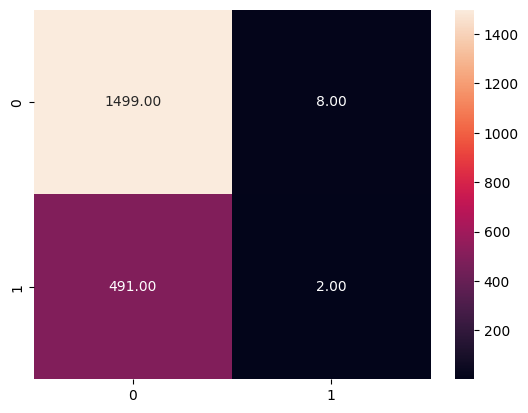

In [64]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt=".2f")


## Regression Modeling

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
X, Y = data.drop(columns=["Price"]), data["Price"]

In [67]:
Y

0       313.342
1       214.370
2       475.290
3       265.532
4       229.810
         ...   
9995     21.480
9996    403.920
9997    484.460
9998    411.630
9999     74.380
Name: Price, Length: 10000, dtype: float64

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [69]:
model = RandomForestRegressor(n_estimators=150, max_depth=3)

In [70]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3, n_estimators=150)

In [71]:
Y_pred = model.predict(X_test)

In [72]:
Y_pred

array([258.97698955, 249.94935915, 257.32852742, ..., 257.38945927,
       257.55142067, 256.14897024], shape=(2000,))

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")
print(f"R2 score: {r2_score(Y_test, Y_pred)}")

MSE: 17937.66594155552
MAE: 111.69961857609347
R2 score: -0.0013032767020333402


MSE = sum [(y_true - y_pred)^2] / N
<br>
MAE = sum [|y_true - y_pred|] / N

In [78]:
price_results = pd.DataFrame({"actual": Y_test, "pred": Y_pred})

In [79]:
price_results

,actual,pred
1537,420.230,258.976990
1892,385.630,249.949359
9661,44.100,257.328527
1544,265.170,250.469721
7707,167.730,250.061182
...,...,...
5886,16.800,256.030388
8146,301.374,268.749620
8104,160.850,257.389459
7442,124.350,257.551421


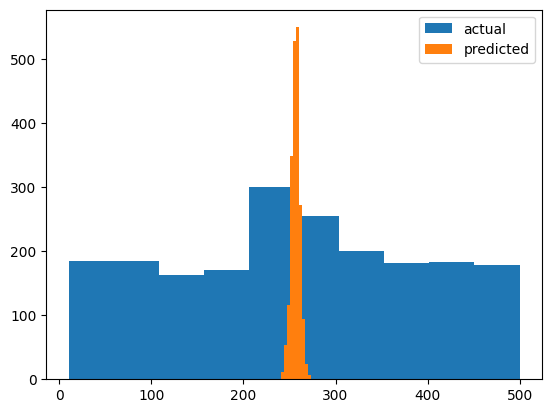

In [82]:
plt.hist(price_results.actual, label='actual')
plt.hist(price_results.pred, label='predicted')
plt.legend()
plt.show()

## Feature Importance Analysis

In [76]:
import matplotlib.pyplot as plt
import numpy as np

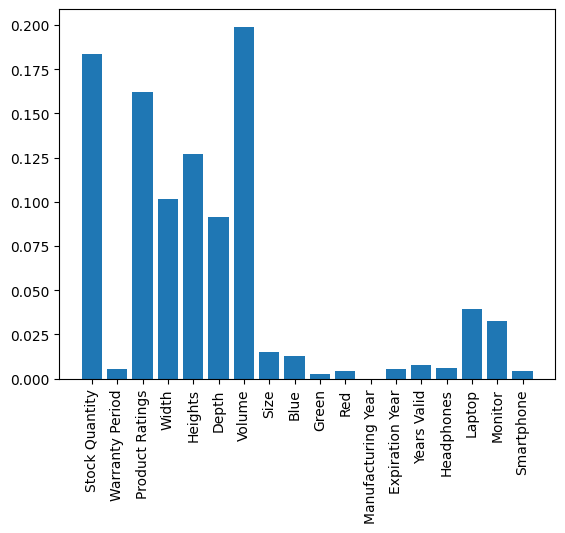

In [77]:
plt.bar(np.arange(0, len(model.feature_importances_)),model.feature_importances_)
plt.xticks(np.arange(0, len(model.feature_importances_)), model.feature_names_in_ , rotation=90)
plt.show()